In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# create dataframe
VGames= pd.read_csv('../DataSource/4. Video Games Sales.csv')
VGames.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,NaN,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,NaN,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

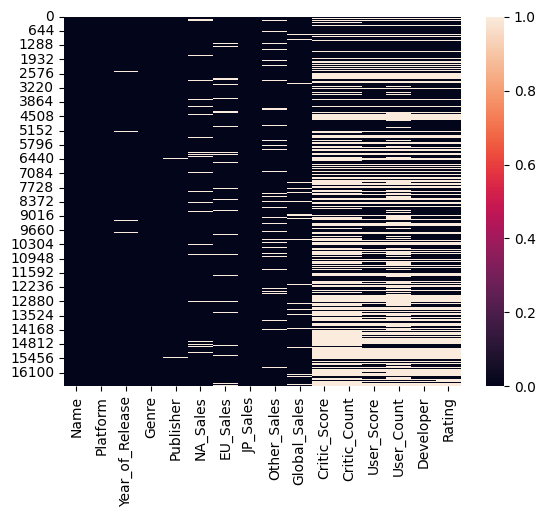

In [4]:
# Check for empty data
sns.heatmap(VGames.isna())

In [5]:
# Clean 'tbd' text in 'user score'
VGames['User_Score'] = VGames['User_Score'].replace(to_replace=['tbd'], value=np.nan)
VGames['User_Score'] = pd.to_numeric(VGames['User_Score'])

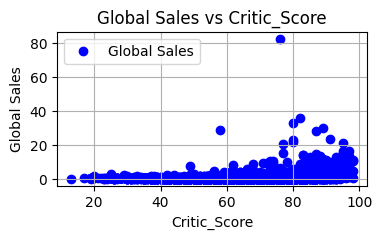

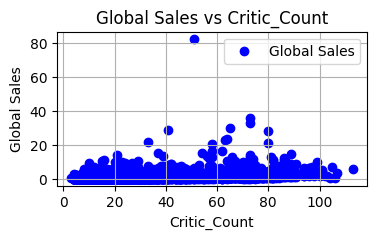

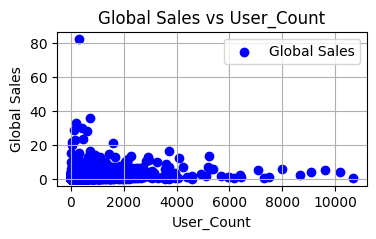

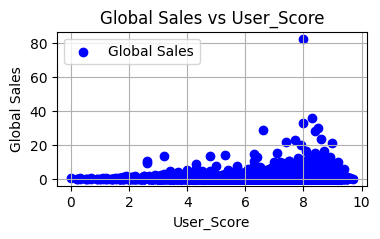

In [6]:
# Verification of trends between dimensions and sales"
dimensions = ['Critic_Score', 'Critic_Count', 'User_Count','User_Score']
for dimension in dimensions:
    plt.figure(figsize=(4, 2))
    plt.scatter(VGames[dimension], VGames['Global_Sales'], label='Global Sales', color='b')
    plt.xlabel(dimension)
    plt.ylabel('Global Sales')
    plt.title('Global Sales vs ' + dimension)
    plt.legend()
    plt.grid(True)
    plt.show()

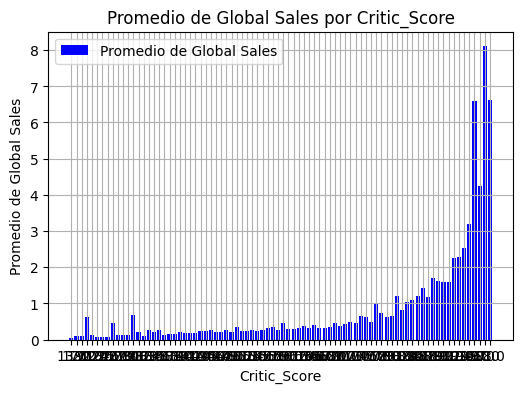

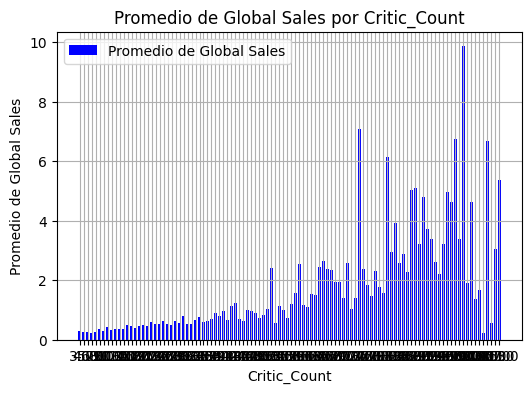

In [7]:
#At first glance, there's no trend, but when summarizing the 'Y' axis (sales) on average for each 'X', a trend is observed
dimensions = ['Critic_Score', 'Critic_Count']

for dimension in dimensions:
    # Calculate the average Global_Sales for each unique value in the dimension.
    avg_sales = VGames.groupby(dimension)['Global_Sales'].mean()
    
    # Create the chart with the average Global_Sales for each unique value in the dimension
    plt.figure(figsize=(6, 4))
    plt.bar(avg_sales.index.astype(str), avg_sales.values, label='Promedio de Global Sales', color='b')
    plt.xlabel(dimension)
    plt.ylabel('Promedio de Global Sales')
    plt.title('Promedio de Global Sales por ' + dimension)
    plt.legend()
    plt.grid(True)
    plt.show()

In [8]:
# The blanks in the overall cost represent 991 records
VGames.loc[VGames["Global_Sales"].isna()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,15.00,NaN,0.24,1.69,NaN,61.0,45.0,6.3,106.0,Good Science Studio,E
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.02,9.09,0.98,NaN,NaN,97.0,50.0,8.2,3994.0,Rockstar North,M
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.04,4.24,0.13,1.32,NaN,88.0,81.0,3.4,8713.0,"Infinity Ward, Sledgehammer Games",M
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5.28,4.19,4.35,0.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16647,Rugby Challenge 3,XOne,2016.0,Sports,Alternative Software,0.00,0.01,0.00,0.00,NaN,NaN,NaN,6.6,5.0,Wicked Witch Software,E
16658,Ben 10 Omniverse 2,X360,2013.0,Action,Namco Bandai Games,0.00,0.01,0.00,0.00,NaN,NaN,NaN,5.1,9.0,High Voltage Software,E10+
16668,Mahou Sensei Negima!? Neo-Pactio Fight!!,Wii,2007.0,Fighting,Marvelous Interactive,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16682,End of Nations,PC,2012.0,Strategy,Trion Worlds,0.01,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,Petroglyph,T


In [9]:
# Verifying that the dataframe doesn't mistake names with ',' and separates them
VGames.loc[1089,:]

Name                             Monsters, Inc.
Platform                                    GBA
Year_of_Release                          2001.0
Genre                                 Adventure
Publisher                                   THQ
NA_Sales                                   0.59
EU_Sales                                   0.95
JP_Sales                                   0.03
Other_Sales                                 0.1
Global_Sales                               1.67
Critic_Score                                NaN
Critic_Count                                NaN
User_Score                                  NaN
User_Count                                  NaN
Developer          Artificial Mind and Movement
Rating                                        E
Name: 1089, dtype: object

In [10]:
# Unique values per column
VGames.nunique()

Name               11562
Platform              31
Year_of_Release       39
Genre                 12
Publisher            581
NA_Sales             392
EU_Sales             302
JP_Sales             244
Other_Sales          148
Global_Sales         613
Critic_Score          82
Critic_Count         106
User_Score            95
User_Count           888
Developer           1696
Rating                 8
dtype: int64

In [11]:
# General information for each column
VGames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         15848 non-null  float64
 6   EU_Sales         15520 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      15341 non-null  float64
 9   Global_Sales     15728 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [12]:
VGames['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [13]:
VGames['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [14]:
# Renaming platforms

VGames.loc[VGames['Platform'] == 'Wii', 'Platform'] = 'Nintendo Wii'
VGames.loc[VGames['Platform'] == 'DS', 'Platform'] = 'Nintendo DS'
VGames.loc[VGames['Platform'] == 'X360', 'Platform'] = 'Xbox360'
VGames.loc[VGames['Platform'] == 'PS3', 'Platform'] = 'Sony PS3'
VGames.loc[VGames['Platform'] == 'PS4', 'Platform'] = 'Sony PS4'
VGames.loc[VGames['Platform'] == '3DS', 'Platform'] = 'Nintendo 3DS'
VGames.loc[VGames['Platform'] == 'PSP', 'Platform'] = 'Sony PSP'
VGames.loc[VGames['Platform'] == 'XOne', 'Platform'] = 'Xbox One'
VGames.loc[VGames['Platform'] == 'WiiU', 'Platform'] = 'Nintendo Wii U'
VGames.loc[VGames['Platform'] == 'PSV', 'Platform'] = 'Sony PS Vita'

In [15]:
# Checking changes in Platform
VGames['Platform'].unique()

array(['Nintendo Wii', 'NES', 'GB', 'Nintendo DS', 'Xbox360', 'Sony PS3',
       'PS2', 'SNES', 'GBA', 'Sony PS4', 'Nintendo 3DS', 'N64', 'PS',
       'XB', 'PC', '2600', 'Sony PSP', 'Xbox One', 'Nintendo Wii U', 'GC',
       'GEN', 'DC', 'Sony PS Vita', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [16]:
VGames.loc[VGames["Platform"] == "2600"]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
89,Pac-Man,2600,1982.0,Puzzle,Atari,7.28,0.45,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,Pitfall!,2600,1981.0,Platform,Activision,4.21,0.24,0.0,0.05,4.50,NaN,NaN,NaN,NaN,NaN,NaN
262,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31,NaN,NaN,NaN,NaN,NaN,NaN
546,Missile Command,2600,1980.0,Shooter,Atari,NaN,0.17,0.0,0.03,2.76,NaN,NaN,NaN,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,Atari,NaN,0.14,0.0,0.03,2.53,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8742,Klax,2600,1989.0,Puzzle,Atari,0.14,0.01,0.0,0.00,0.15,NaN,NaN,NaN,NaN,NaN,NaN
9096,Krull,2600,1982.0,Action,Atari,0.13,0.01,0.0,0.00,0.14,NaN,NaN,NaN,NaN,NaN,NaN
9488,RealSports Volleyball,2600,1981.0,Sports,Atari,0.12,0.01,0.0,0.00,0.13,NaN,NaN,NaN,NaN,NaN,NaN
11748,Super Football,2600,1987.0,Sports,Atari,0.07,0.00,0.0,0.00,0.08,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Rename 2600 to Atari 2600
VGames.loc[VGames['Platform'] == '2600', 'Platform'] = 'Atari 2600'

In [18]:
# Add ID to the table
VGames['ID'] = range(1, len(VGames) + 1)

In [19]:
# New table of cost per region excluding global cost

VGSales = VGames[['ID', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].copy()

In [20]:
VGSales.head()

,ID,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,41.36,28.96,3.77,NaN
1,2,29.08,3.58,6.81,0.77
2,3,15.68,12.76,3.79,3.29
3,4,15.61,10.93,3.28,NaN
4,5,11.27,8.89,10.22,1.00


In [21]:
# Replace null and 'NA' values with zero '0'
VGSales['NA_Sales'] = VGSales['NA_Sales'].fillna(0)
VGSales['EU_Sales'] = VGSales['EU_Sales'].fillna(0)
VGSales['JP_Sales'] = VGSales['JP_Sales'].fillna(0)
VGSales['Other_Sales'] = VGSales['Other_Sales'].fillna(0)

VGSales['NA_Sales'] = VGSales['NA_Sales'].replace('NA', 0)
VGSales['EU_Sales'] = VGSales['EU_Sales'].replace('NA', 0)
VGSales['JP_Sales'] = VGSales['JP_Sales'].replace('NA', 0)
VGSales['Other_Sales'] = VGSales['Other_Sales'].replace('NA', 0)

print(VGSales)

          ID  NA_Sales  EU_Sales  JP_Sales  Other_Sales
0          1     41.36     28.96      3.77         0.00
1          2     29.08      3.58      6.81         0.77
2          3     15.68     12.76      3.79         3.29
3          4     15.61     10.93      3.28         0.00
4          5     11.27      8.89     10.22         1.00
...      ...       ...       ...       ...          ...
16714  16715      0.00      0.00      0.01         0.00
16715  16716      0.00      0.00      0.00         0.00
16716  16717      0.00      0.00      0.01         0.00
16717  16718      0.01      0.00      0.00         0.00
16718  16719      0.00      0.00      0.01         0.00

[16719 rows x 5 columns]


In [22]:
# Rename columns
VGSales.rename(columns={'NA_Sales': 'USA', 'EU_Sales': 'EUU', 'JP_Sales': 'JPN','Other_Sales':'WLD'},inplace=True)
print(VGSales)

          ID    USA    EUU    JPN   WLD
0          1  41.36  28.96   3.77  0.00
1          2  29.08   3.58   6.81  0.77
2          3  15.68  12.76   3.79  3.29
3          4  15.61  10.93   3.28  0.00
4          5  11.27   8.89  10.22  1.00
...      ...    ...    ...    ...   ...
16714  16715   0.00   0.00   0.01  0.00
16715  16716   0.00   0.00   0.00  0.00
16716  16717   0.00   0.00   0.01  0.00
16717  16718   0.01   0.00   0.00  0.00
16718  16719   0.00   0.00   0.01  0.00

[16719 rows x 5 columns]


In [23]:
VGSales['Total']=VGSales['USA']+VGSales['EUU']+VGSales['JPN']+VGSales['WLD']

In [24]:
# Pivoting columns
VGSalesP=pd.melt(VGSales, id_vars=['ID'], value_vars=['USA', 'EUU', 'JPN', 'WLD','Total'], var_name='Region', value_name='Sales')
VGSalesP.head(-10)


,ID,Region,Sales
0,1,USA,41.36
1,2,USA,29.08
2,3,USA,15.68
3,4,USA,15.61
4,5,USA,11.27
...,...,...,...
83580,16705,Total,0.01
83581,16706,Total,0.01
83582,16707,Total,0.01
83583,16708,Total,0.01


In [25]:
# Verify that the transposition (pivoting) was successful

VGSalesP.loc[VGSalesP['ID'] == 1]

,ID,Region,Sales
0,1,USA,41.36
16719,1,EUU,28.96
33438,1,JPN,3.77
50157,1,WLD,0.00
66876,1,Total,74.09


In [26]:
VGames.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating',
       'ID'],
      dtype='object')

In [27]:
# To remove columns from the original DataFrame"
VGames.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], axis=1, inplace=True)
VGames.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer',
       'Rating', 'ID'],
      dtype='object')

In [28]:
# To review empty data in Year_of_Release

VGames.loc[VGames["Year_of_Release"].isna()]

# Here's no way to complete it except for those that have the year at the end of the name

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,ID
183,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,94.0,29.0,8.5,140.0,EA Tiburon,E,184
377,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,84.0,20.0,6.4,76.0,EA Canada,E,378
456,LEGO Batman: The Videogame,Nintendo Wii,NaN,Action,Warner Bros. Interactive Entertainment,74.0,17.0,7.9,22.0,Traveller's Tales,E10+,457
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,476
609,Space Invaders,Atari 2600,NaN,Shooter,Atari,NaN,NaN,NaN,NaN,NaN,NaN,610
...,...,...,...,...,...,...,...,...,...,...,...,...
16376,PDC World Championship Darts 2008,Sony PSP,NaN,Sports,Oxygen Interactive,43.0,7.0,NaN,NaN,Oxygen Interactive,E10+,16377
16409,Freaky Flyers,GC,NaN,Racing,Unknown,69.0,14.0,6.5,6.0,Midway,T,16410
16452,Inversion,PC,NaN,Shooter,Namco Bandai Games,59.0,6.0,6.7,107.0,Saber Interactive,M,16453
16462,Hakuouki: Shinsengumi Kitan,Sony PS3,NaN,Adventure,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,16463


In [29]:
VGames.loc[VGames["Platform"] == "PS2"]

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,ID
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,95.0,80.0,9.0,1588.0,Rockstar North,M,18
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,95.0,62.0,8.7,730.0,Rockstar North,M,25
28,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,95.0,54.0,8.4,314.0,Polyphony Digital,E,29
38,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,97.0,56.0,8.5,664.0,DMA Design,M,39
48,Gran Turismo 4,PS2,2004.0,Racing,Sony Computer Entertainment,89.0,74.0,8.5,272.0,Polyphony Digital,E,49
...,...,...,...,...,...,...,...,...,...,...,...,...
16674,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,2008.0,Adventure,Alchemist,NaN,NaN,NaN,NaN,NaN,NaN,16675
16675,Kanokon: Esuii,PS2,2008.0,Adventure,5pb,NaN,NaN,NaN,NaN,NaN,NaN,16676
16687,Scarlett: Nichijou no Kyoukaisen,PS2,2008.0,Adventure,Kadokawa Shoten,NaN,NaN,NaN,NaN,NaN,NaN,16688
16693,Real Rode,PS2,2008.0,Adventure,Kadokawa Shoten,NaN,NaN,NaN,NaN,NaN,NaN,16694


<Axes: >

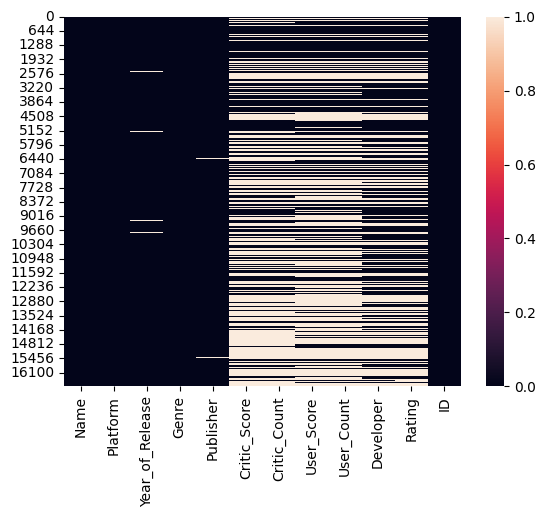

In [30]:
sns.heatmap(VGames.isna())

In [31]:
# It's confirmed that the empties have reduced from 991 records to 116
a=VGSalesP[(VGSalesP['Region'] == 'Total' ) & (VGSalesP['Sales'] == 0)]
print(a)

          ID Region  Sales
68083   1208  Total    0.0
70026   3151  Total    0.0
70992   4117  Total    0.0
71350   4475  Total    0.0
75988   9113  Total    0.0
...      ...    ...    ...
83556  16681  Total    0.0
83572  16697  Total    0.0
83586  16711  Total    0.0
83589  16714  Total    0.0
83591  16716  Total    0.0

[116 rows x 3 columns]


In [32]:
#The process involves removing records without sales data

VGSalesP.drop(VGSalesP[(VGSalesP['Region'] == 'Total') & (VGSalesP['Sales'] == 0)].index, inplace=True)
print(VGSalesP[(VGSalesP['Region'] == 'Total' ) & (VGSalesP['Sales'] == 0)])

Empty DataFrame
Columns: [ID, Region, Sales]
Index: []


In [33]:
# The records in Table 1 without 'ID' values present in Table 2 are being deleted

VGamesF = VGames[VGames['ID'].isin(VGSalesP['ID'])]
VGamesF = VGamesF[~VGamesF['ID'].isin(a['ID'])] # Remove rows with IDs that were zero '0' in total sales
VGamesF

,Name,Platform,Year_of_Release,Genre,Publisher,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,ID
0,Wii Sports,Nintendo Wii,2006.0,Sports,Nintendo,76.0,51.0,8.0,322.0,Nintendo,E,1
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,2
2,Mario Kart Wii,Nintendo Wii,2008.0,Racing,Nintendo,82.0,73.0,8.3,709.0,Nintendo,E,3
3,Wii Sports Resort,Nintendo Wii,2009.0,Sports,Nintendo,80.0,73.0,8.0,192.0,Nintendo,E,4
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...
16712,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,NaN,NaN,NaN,NaN,NaN,NaN,16713
16714,Samurai Warriors: Sanada Maru,Sony PS3,2016.0,Action,Tecmo Koei,NaN,NaN,NaN,NaN,NaN,NaN,16715
16716,Haitaka no Psychedelica,Sony PS Vita,2016.0,Adventure,Idea Factory,NaN,NaN,NaN,NaN,NaN,NaN,16717
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,NaN,NaN,NaN,NaN,NaN,NaN,16718


In [34]:
# Export files to CSV without the DataFrame index

VGSalesP.to_csv('../DataClean/Video_Games_Sales_M.CSV',index=False)

VGamesF.to_csv('../DataClean/Datos_Video_Games_M.CSV',index=False)

In [35]:
#Solving Sales 2017 prediction for Shooters

# Merge the two tables based on the "ID" field
merged_df = pd.merge(VGamesF, VGSalesP, on='ID')

# Filter by genre "Shooters" and the year range from 2009 to 2016
filtered_df = merged_df[(merged_df['Genre'] == 'Shooter') & (merged_df['Year_of_Release'].between(2011, 2016))]

# Calculate the total sales per year
total_sales_by_year = filtered_df.groupby('Year_of_Release')['Sales'].sum().reset_index()

# Display the table with total sales per year for shooters between 2009 and 2016
print(total_sales_by_year)


   Year_of_Release   Sales
0           2011.0  182.18
1           2012.0  134.36
2           2013.0  108.48
3           2014.0  114.78
4           2015.0  111.56
5           2016.0   70.66


In [36]:
from sklearn.linear_model import LinearRegression

#Filter the data until 2016 for use as training data
train_data = total_sales_by_year[total_sales_by_year['Year_of_Release'] < 2017]

# Create the linear regression model
model = LinearRegression()

# ETrain the model with the training data
X_train = train_data[['Year_of_Release']]  # Característica (año)
y_train = train_data['Sales']  # Variable objetivo (ventas)
model.fit(X_train, y_train)

# Predict sales for the year 2017
year_2017 = pd.DataFrame({'Year_of_Release': [2017]})
predicted_sales_2017 = model.predict(year_2017)

print("Ventas predichas para 2017:", predicted_sales_2017[0])


Ventas predichas para 2017: 58.36666666666861


In [37]:
# Calculate the 3-period moving average for the sales column
total_sales_by_year['Sales_Moving_Avg'] = total_sales_by_year['Sales'].rolling(window=3).mean()-15 # Forecast correction

# Copy of the original to preserve data
Sale_by_Year=total_sales_by_year.copy()

# Remove rows with NaN values (since the first two rows won't have the moving average)
total_sales_by_year.dropna(inplace=True)

# Show the DataFrame with the 3-period moving average3
print(total_sales_by_year)

   Year_of_Release   Sales  Sales_Moving_Avg
2           2013.0  108.48        126.673333
3           2014.0  114.78        104.206667
4           2015.0  111.56         96.606667
5           2016.0   70.66         84.000000


In [38]:
#Filter the data until 2016 for use as training data
train_data2 = total_sales_by_year[total_sales_by_year['Year_of_Release'] < 2017]

# Create the linear regression model2
model2 = LinearRegression()

# ETrain the model with the training data
X_train2 = train_data2[['Year_of_Release']]  # Característica (año)
y_train2 = train_data2['Sales_Moving_Avg']  # Variable objetivo (ventas)
model2.fit(X_train2, y_train2)

# Predict sales for the year 2017
year_2017_2 = pd.DataFrame({'Year_of_Release': [2017]})
predicted_sales_2017_improved = model2.predict(year_2017_2)

print("Ventas predichas para 2017:", predicted_sales_2017_improved[0])



Ventas predichas para 2017: 68.96666666666351


In [39]:
# New record to add
nuevo_registro = [2017, predicted_sales_2017[0], predicted_sales_2017_improved[0]]

# Add the new record to the DataFrame using loc[]
total_sales_by_year.loc[len(total_sales_by_year)+1] = nuevo_registro
Sale_by_Year.loc[len(Sale_by_Year)+1]=nuevo_registro


# Show the updated DataFrame
print(total_sales_by_year)

   Year_of_Release       Sales  Sales_Moving_Avg
2           2013.0  108.480000        126.673333
3           2014.0  114.780000        104.206667
4           2015.0  111.560000         96.606667
5           2017.0   58.366667         68.966667


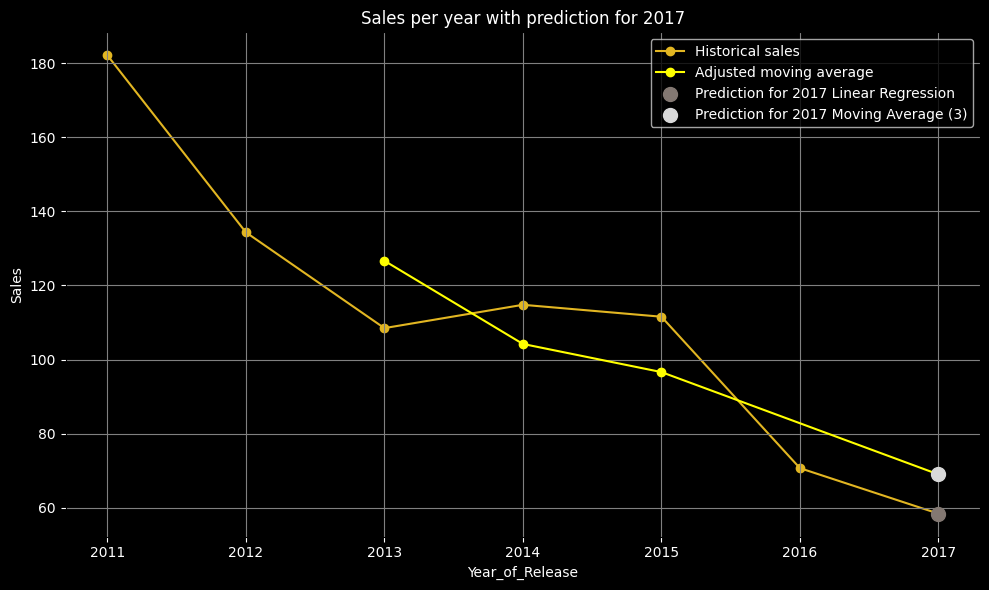

In [70]:
# Plot historical data and prediction
plt.figure(figsize=(10, 6),facecolor="#000000")


# Original historical data
plt.plot(Sale_by_Year['Year_of_Release'], Sale_by_Year['Sales'], marker='o', label='Historical sales', color='#E2B622',zorder=1)

# Historical data with a 3-period moving average
plt.plot(total_sales_by_year['Year_of_Release'], total_sales_by_year['Sales_Moving_Avg'], marker='o', label='Adjusted moving average',color='yellow',zorder=2)

# Forecast period
plt.scatter(2017, predicted_sales_2017, color='#837872', label='Prediction for 2017 Linear Regression',marker='o',zorder=3, s=100)

# Forecast period with moving average
plt.scatter(2017, predicted_sales_2017_improved, color='#D9D9D9', label='Prediction for 2017 Moving Average (3)',marker='o',zorder=4, s=100)

# color

plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['legend.facecolor'] = 'black'
plt.tick_params(axis='x', colors='white')  # Color de los ejes x
plt.tick_params(axis='y', colors='white')  # Color de los ejes y

# Graph settings
plt.title('Sales per year with prediction for 2017',color='white')
plt.xlabel('Year_of_Release',color='white')
plt.ylabel('Sales',color='white')
plt.legend(facecolor='black',labelcolor='white')
plt.grid(True,color='gray')
plt.tight_layout()

# Show the graph
plt.show()

In [80]:
#Solving Sales 2017 prediction for Shooters

# Merge the two tables based on the "ID" field
merged_df2 = pd.merge(VGamesF, VGSalesP, on='ID')

# Calculate the total sales per year
total_sales_by_year_Global = merged_df2.groupby(['Year_of_Release', 'Genre'], as_index=False)['Sales'].sum()


# Display the table with total sales per year for shooters between 2009 and 2016
total_sales_by_year_Global.head(-5)

# Export files to CSV without the DataFrame index

total_sales_by_year_Global.to_csv('../DataClean/total_sales_by_year_Global.CSV',index=False)

